# Lead Score Case Study by Krishna Katta & Neetima Verma

### Problem Statement:

#### The Data of customer has been provided by an education company with numerus predictors. The task is to construct a model to predict if a particular customer will enroll in the program or not. The customer who enroll in the program is called Hot Leads. This will help the sales team their attention to potential Hot Leads to increase the conversion rate.

In [108]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [110]:
# Importing datasets
LeadData = pd.read_csv("Leads.csv")
LeadData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [111]:
LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [112]:
# Replace "Select" value with not a number value
LeadData.replace("Select",np.nan,inplace=True)

In [113]:
#Dropping all columns whose values are null and its null percetage is more than 40%
LeadData = LeadData.drop(LeadData.loc[:,list(round(100*(LeadData.isnull().sum()/len(LeadData.index)), 2)>=40)].columns, 1)

In [114]:
#checking shape after dropping columns
LeadData.shape

(9240, 30)

In [115]:
# as there are too many categorical variables dropping below columns
drop_cols=['City','Country','Tags','X Education Forums','Newspaper']
LeadData.drop(columns=drop_cols,axis=1,inplace=True)

In [116]:
# Replacing Yes & No with 1's and 0's
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
LeadData[varlist] = LeadData[varlist].apply(binary_map)

In [117]:
# As below column contain unique/single values and hence dropping those columns.
drop_cols=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque']
LeadData.drop(columns=drop_cols,axis=1,inplace=True)

In [118]:
#checking info after dropping columns
LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [119]:
#imputing null values.
((LeadData.isnull().sum()[LeadData.isnull().sum()>0]/LeadData.shape[0])*100)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64

In [120]:
#Imputing null values with mean and mode.
LeadData['Lead Source'] = LeadData['Lead Source'].fillna(LeadData['Lead Source'].mode()[0])
LeadData['TotalVisits'] = LeadData['TotalVisits'].fillna(LeadData['TotalVisits'].mean())
LeadData['Page Views Per Visit'] = LeadData['Page Views Per Visit'].fillna(LeadData['Page Views Per Visit'].mean())
LeadData['Last Activity'] = LeadData['Last Activity'].fillna(LeadData['Last Activity'].mode()[0])
LeadData['Specialization'] = LeadData['Specialization'].fillna(LeadData['Specialization'].mode()[0])
LeadData['What is your current occupation'] = LeadData['What is your current occupation'].fillna(LeadData['What is your current occupation'].mode()[0])
LeadData['What matters most to you in choosing a course'] = LeadData['What matters most to you in choosing a course'].fillna(LeadData['What matters most to you in choosing a course'].mode()[0])

In [121]:
#Checking null values
((LeadData.isnull().sum()[LeadData.isnull().sum()>0]/LeadData.shape[0])*100)

Series([], dtype: float64)

### Exploratory Data Analytics

####  Univariate Analysis

#### Total time spent on website

In [122]:
LeadData['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

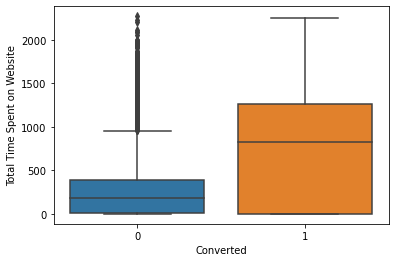

In [123]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = LeadData)
plt.show()

### Inference
#### Clearly customers who have spend more time on the website have higher probability of enrolling with the academy.


#### Lead Origin:

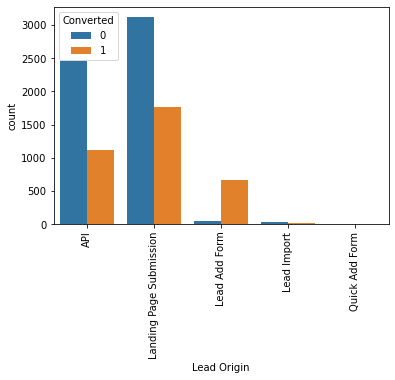

In [124]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = LeadData)
xticks(rotation = 90)
plt.show()

#### Inference: Lead Add Form has high conversion ratio.

#### Occupation:

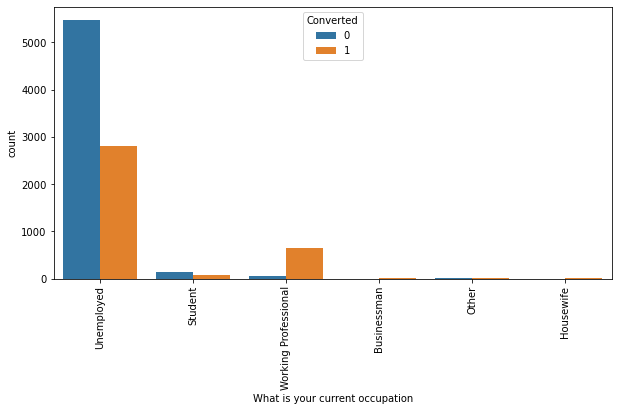

In [125]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = LeadData)
xticks(rotation = 90)
plt.show()

#### Inference: Though number of converted customers are high in "Unemployed" category, It is the working professionals who have higher conversion rate.

#### Lead Source

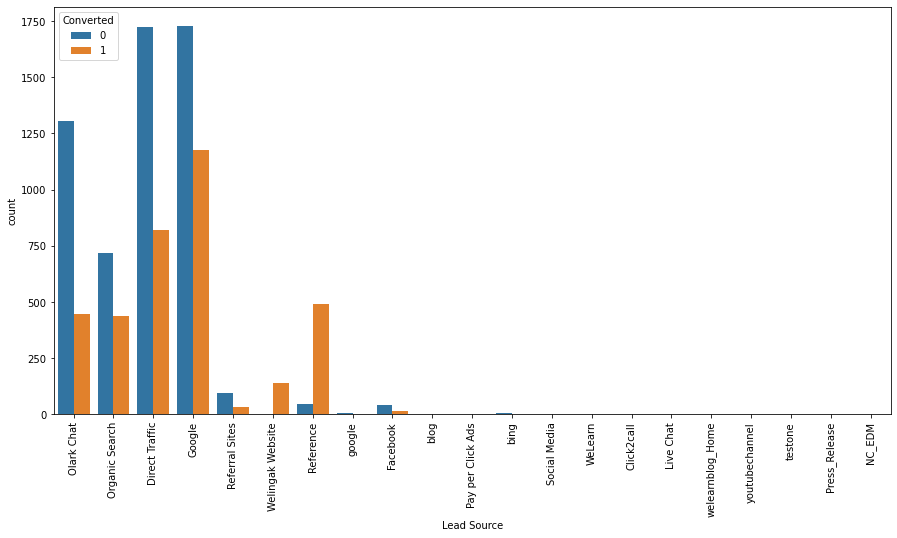

In [126]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = LeadData)
xticks(rotation = 90)
plt.show()

In [127]:
LeadData['Lead Source'] = LeadData['Lead Source'].replace(['google'], 'Google')

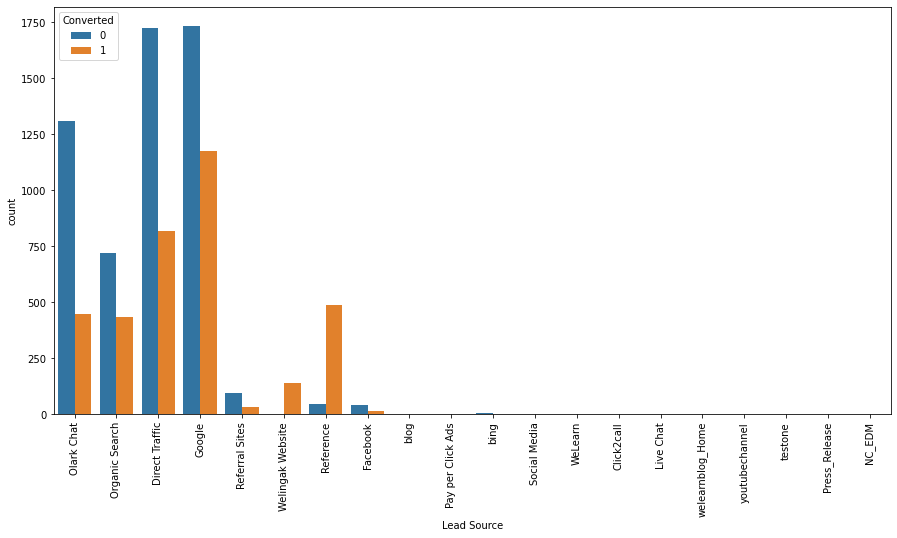

In [128]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = LeadData)
xticks(rotation = 90)
plt.show()

#### Inference: Reference leads and welingak website categories have high conversion rate.

In [129]:
LeadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

In [130]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummy_var = pd.get_dummies(LeadData[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)

# Adding the results to the origina dataframe
LeadData = pd.concat([LeadData, dummy_var], axis=1)

In [131]:
LeadData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 97 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin                                                              9240 non-null   object 
 1   Lead Source                                                              9240 non-null   object 
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

In [132]:
#Dropping variables for which dummy variables are created
drop_var_had_dummy=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
LeadData.drop(columns=drop_var_had_dummy,axis=1,inplace=True)

In [133]:
from sklearn.model_selection import train_test_split

## Test-Train Split

In [134]:
# Assigning feature variable to X
X = LeadData.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Get updates on DM Content,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [135]:
# Assigning response variable to y
y = LeadData['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [136]:
# Splitting the data into Test and Train
X_LeadTrain, X_LeadTest, y_LeadTrain, y_LeadTest = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Feature Scaling

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
#Fitting and transforming X_LeadTrain data set using MinMaxScaler
scaler = MinMaxScaler()

X_LeadTrain[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_LeadTrain[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_LeadTrain.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Get updates on DM Content,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
# Checking the conversion Rate
Conversion_rate = (sum(LeadData['Converted'])/len(LeadData['Converted'].index))*100
Conversion_rate

38.53896103896104

## Model Building:

In [140]:
import statsmodels.api as sm

In [141]:
# Logistic regression model
logimdl = sm.GLM(y_LeadTrain,(sm.add_constant(X_LeadTrain)), family = sm.families.Binomial())
logimdl.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Jun 2022   Deviance:                          nan
Time:                        05:02:03   Pearson chi2:                 8.48e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.513e+15   5.27e+07  -2.87e+07      0.000   -1.51e+15   -1.51e+15
Do Not Email                                                            -1.743e+14   4.44e+06  -3.93e+07      0.000   -1.74e+14   -1.74e+14
Do Not Call                                                              3.383e+15   4.77e+07   7.09e+07      0.000    3.38e+15    3.38e+15
TotalVisits                                                              3.557e+15   4.73e+07   7.52e+07      0.000    3.56e+15    3.56e+15
Total Time Spent on Website                                              3.143e+15   3.95e+06   7.96e+08      0.000    3.14e+15    3.14e+15
Page Views Per Visit                                                     -3.61e+15   3.04e+07  -1.19e+08      0.000   -3.61e+15   -3.61e+15
Search                                                                  -2.687e+14   2.19e+07  -1.23e+07      0.000   -2.69e+14   -2.69e+14
Newspaper Article                                                        8.255e+14   5.35e+07   1.54e+07      0.000    8.25e+14    8.25e+14
Digital Advertisement                                                   -2.533e+15    4.3e+07  -5.89e+07      0.000   -2.53e+15   -2.53e+15
Through Recommendations                                                 -2.431e+14    2.8e+07   -8.7e+06      0.000   -2.43e+14   -2.43e+14
Get updates on DM Content                                                 -17.5404   5.69e-07  -3.08e+07      0.000     -17.540     -17.540
A free copy of Mastering The Interview                                   -1.02e+14   2.63e+06  -3.88e+07      0.000   -1.02e+14   -1.02e+14
Lead Origin_Landing Page Submission                                     -1.453e+14   2.91e+06  -4.99e+07      0.000   -1.45e+14   -1.45e+14
Lead Origin_Lead Add Form                                                2.161e+15    1.3e+07   1.67e+08      0.000    2.16e+15    2.16e+15
Lead Origin_Lead Import                                                 -1.893e+15    4.8e+07  -3.94e+07      0.000   -1.89e+15   -1.89e+15
Lead Origin_Quick Add Form                                               3.747e+15   6.78e+07   5.52e+07      0.000    3.75e+15    3.75e+15
Lead Source_Direct Traffic                                               2.758e+15    4.1e+07   6.73e+07      0.000    2.76e+15    2.76e+15
Lead Source_Facebook                                                     3.647e+15    6.3e+07   5.79e+07      0.000    3.65e+15    3.65e+15
Lead Source_Google                                                       2.865e+15   4.09e+07   7.01e+07      0.000    2.87e+15    2.87e+15
Lea

## Feature Selection Using RFE (Recursive Feature Elimination)

In [142]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()

In [143]:
from sklearn.feature_selection import RFE
# Considering 18 variables as output
rfe = RFE(logisticreg, 18)
rfe = rfe.fit(X_LeadTrain, y_LeadTrain)

In [144]:
list(zip(X_LeadTrain.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 31),
 ('Newspaper Article', False, 17),
 ('Digital Advertisement', False, 4),
 ('Through Recommendations', False, 22),
 ('Get updates on DM Content', False, 70),
 ('A free copy of Mastering The Interview', False, 64),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Refe

In [145]:
col = X_LeadTrain.columns[rfe.support_]

In [146]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [147]:
LeadData1 = LeadData.drop(columns=X_LeadTrain.columns[~rfe.support_], axis=1)

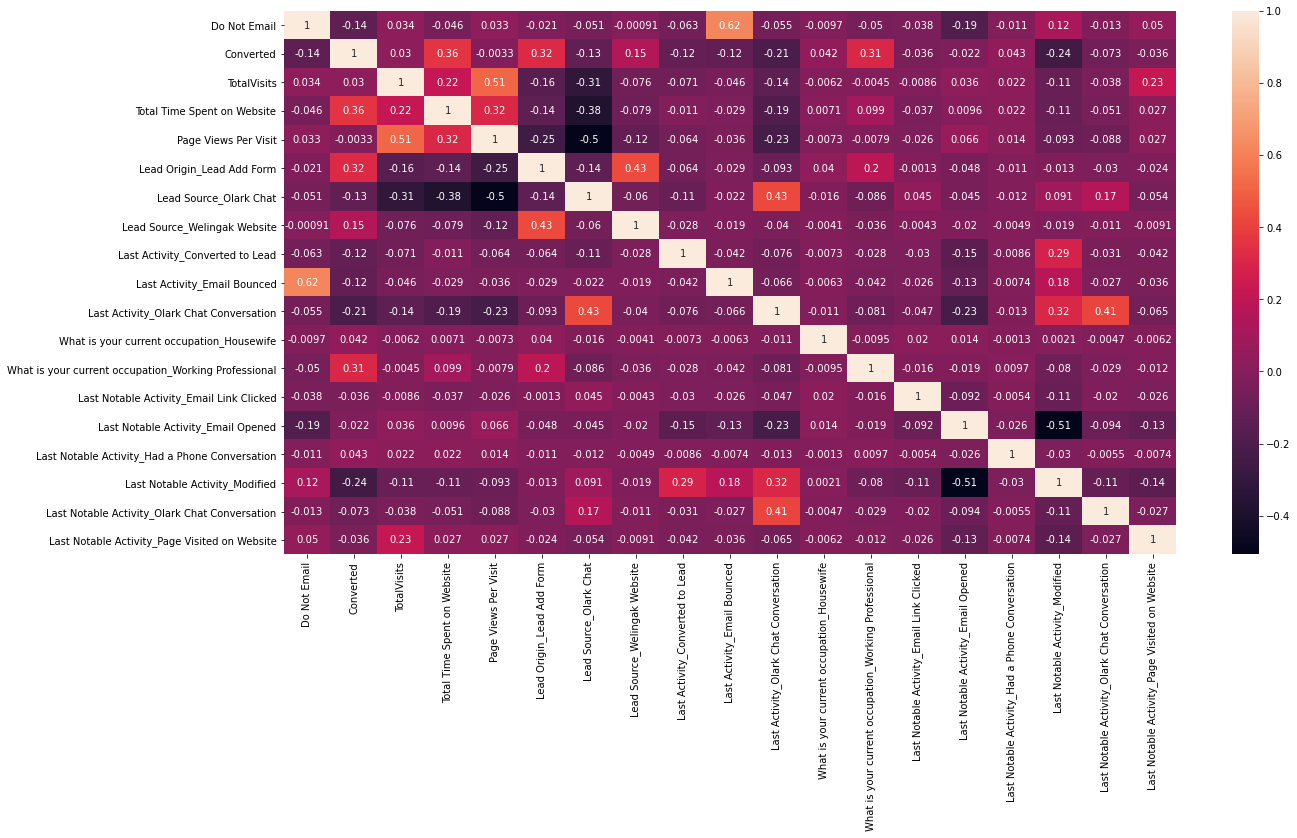

In [148]:
plt.figure(figsize = (20,10))
sns.heatmap(LeadData1.corr(),annot = True)
plt.show()

##### Inference: From the above Heatmap it is clear that "Total time Spent on Website", "Lead Origin_Lead Add Form", "Working professionals" and "Lead Source_Welingak Website" have high correlation with target variable "Converted"

In [149]:
X_LeadTrain.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'Digital Advertisement',
       'Through Recommendations', 'Get updates on DM Content',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       '

In [150]:
#Generalized Linear Model Regression 
X_LeadTrain_sm = sm.add_constant(X_LeadTrain[col])
logimdl2 = sm.GLM(y_LeadTrain,X_LeadTrain_sm, family = sm.families.Binomial())
result = logimdl2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.9
Date:                Mon, 13 Jun 2022   Deviance:                       5349.9
Time:                        05:02:13   Pearson chi2:                 7.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8147      0.105     -7.736      0.000      -1.021      -0.608
Do Not Email                                            -1.3277      0.197     -6.757      0.000      -1.713      -0.943
TotalVisits                                              8.9735      2.403      3.734      0.000       4.263      13.684
Total Time Spent on Website                              4.5654      0.165     27.740      0.000       4.243       4.888
Page Views Per Visit                                    -3.7900      1.291     -2.935      0.003      -6.321      -1.259
Lead Origin_Lead Add Form                                3.6742      0.200     18.398      0.000       3.283       4.066
Lead Source_Olark Chat                                   1.0789      0.120      9.004      0.000       0.844       1.314
Lead Source_Welingak Website                             1.9757      0.744      2.656      0.008       0.518       3.434
Last Activity_Converted to Lead                         -1.0569      0.229     -4.617      0.000      -1.506      -0.608
Last Activity_Email Bounced                             -1.1234      0.348     -3.231      0.001      -1.805      -0.442
Last Activity_Olark Chat Conversation                   -1.2349      0.193     -6.385      0.000      -1.614      -0.856
What is your current occupation_Housewife               22.9152   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_Working Professional     2.8096      0.188     14.909      0.000       2.440       3.179
Last Notable Activity_Email Link Clicked                -1.9119      0.272     -7.035      0.000      -2.445      -1.379
Last Notable Activity_Email Opened                      -1.3357      0.087    -15.357      0.000      -1.506      -1.165
Last Notable Activity_Had a Phone Conversation           2.0355      1.103      1.845      0.065      -0.126       4.197
Last Notable Activity_Modified                          -1.6872      0.099    -16.990      0.000      -1.882      -1.493
Last Notable Activity_Olark Chat Conversation           -1.4756      0.377     -3.917      0.000      -2.214      -0.737
Last Notable Activity_Page Visited on Website           -1.8434      0.204     -9.048      0.000      -2.243      -1.444
========================================================================================================================
"""

#### Getting the predicted values on the train set

In [151]:
y_LeadTrain_Pred = result.predict(X_LeadTrain_sm)
y_LeadTrain_Pred[:10]

1871    0.255123
6795    0.245922
3516    0.299014
8105    0.816244
3934    0.194206
4844    0.993427
3297    0.122330
8071    0.990315
987     0.124087
7423    0.911325
dtype: float64

#### Getting the train predicted values on the train set

In [152]:
y_LeadTrain_Pred = y_LeadTrain_Pred.values.reshape(-1)
y_LeadTrain_Pred[:10]

array([0.25512267, 0.24592201, 0.29901401, 0.81624361, 0.194206  ,
       0.99342743, 0.12233048, 0.99031549, 0.12408696, 0.91132459])

In [153]:
#Creating data frame with actual converted and converted probability calculated by GLM
y_LeadTrain_Pred_Final = pd.DataFrame({'Converted':y_LeadTrain.values, 'Converted_Prob':y_LeadTrain_Pred})
y_LeadTrain_Pred_Final['ID'] = y_LeadTrain.index
y_LeadTrain_Pred_Final.head()

,Converted,Converted_Prob,ID
0,0,0.255123,1871
1,0,0.245922,6795
2,0,0.299014,3516
3,0,0.816244,8105
4,0,0.194206,3934


In [154]:
#Considering cutoff as 0.3 
y_LeadTrain_Pred_Final['predicted'] = y_LeadTrain_Pred_Final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_LeadTrain_Pred_Final.head(20)

,Converted,Converted_Prob,ID,predicted
0,0,0.255123,1871,0
1,0,0.245922,6795,0
2,0,0.299014,3516,0
3,0,0.816244,8105,1
4,0,0.194206,3934,0
5,1,0.993427,4844,1
6,0,0.122330,3297,0
7,1,0.990315,8071,1
8,0,0.124087,987,0
9,1,0.911325,7423,1


In [155]:
from sklearn import metrics

#### Confusion Matrix 

In [156]:
ConfusionMatrix = metrics.confusion_matrix(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted )
print(ConfusionMatrix)

[[3127  875]
 [ 399 2067]]


In [157]:
# The overall accuracy.
print(metrics.accuracy_score(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted))

0.803030303030303


## Checking VIF:

#### Checking for the VIF values of the feature variables. 

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_LeadTrain[col].columns
vif['VIF'] = [variance_inflation_factor(X_LeadTrain[col].values, i) for i in range(X_LeadTrain[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.00
15,Last Notable Activity_Modified,2.56
1,TotalVisits,2.00
9,Last Activity_Olark Chat Conversation,1.99
2,Total Time Spent on Website,1.87
0,Do Not Email,1.86
8,Last Activity_Email Bounced,1.82
5,Lead Source_Olark Chat,1.69
13,Last Notable Activity_Email Opened,1.67
4,Lead Origin_Lead Add Form,1.43


#### Inference: All the VIF's are less than 5. Hence there is no variable in the Model having high inflation factor with any other variables.

In [161]:
TP = ConfusionMatrix[1,1] # true positive 
TN = ConfusionMatrix[0,0] # true negatives
FP = ConfusionMatrix[0,1] # false positives
FN = ConfusionMatrix[1,0] # false negatives

In [162]:
# Sensitivity of this logistic regression model
TP / float(TP+FN) 

0.8381995133819952

In [163]:
# Specificity
TN / float(TN+FP)

0.7813593203398301

In [164]:
# Calculating false postive rate - predicting churn when customer did not churned
print(FP/ float(TN+FP))

0.21864067966016992


In [165]:
# positive predictive value 
print (TP / float(TP+FP))

0.7025832766825288


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

## ROC Curve

In [167]:
#Function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [168]:
fpr, tpr, thresholds = metrics.roc_curve( y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.Converted_Prob, drop_intermediate = False )

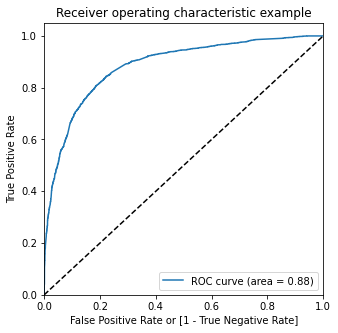

In [169]:
#Applying function to predicted values
draw_roc(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.Converted_Prob)

## Optimal Cutoff Point:

In [170]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_LeadTrain_Pred_Final[i]= y_LeadTrain_Pred_Final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_LeadTrain_Pred_Final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.255123,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.245922,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.299014,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.816244,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.194206,3934,0,1,1,0,0,0,0,0,0,0,0


In [171]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.591991  0.967559  0.360570
0.2   0.2  0.759431  0.906326  0.668916
0.3   0.3  0.803030  0.838200  0.781359
0.4   0.4  0.816017  0.770073  0.844328
0.5   0.5  0.818955  0.706002  0.888556
0.6   0.6  0.798856  0.594891  0.924538
0.7   0.7  0.784323  0.517843  0.948526
0.8   0.8  0.760977  0.419303  0.971514
0.9   0.9  0.717378  0.278183  0.988006


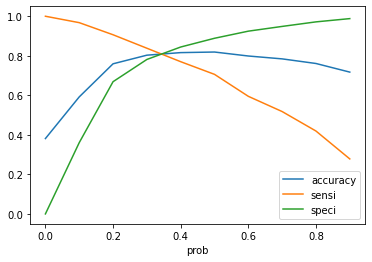

In [172]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Inference: From the curve above 0.35 is the optimum point will be cutoff probability.

In [173]:
#Calculating final prediction value using optimum cutoff probability value 0.35 from the graph.
y_LeadTrain_Pred_Final['final_predicted'] = y_LeadTrain_Pred_Final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_LeadTrain_Pred_Final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.255123,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.245922,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.299014,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.816244,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.194206,3934,0,1,1,0,0,0,0,0,0,0,0,0


### Calculating Lead Score:

In [174]:
y_LeadTrain_Pred_Final['Lead_Score'] = y_LeadTrain_Pred_Final.Converted_Prob.map( lambda x: round(x*100))

In [177]:
y_LeadTrain_Pred_Final.head(200)

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.255123,1871,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.245922,6795,0,1,1,1,0,0,0,0,0,0,0,0,25
2,0,0.299014,3516,0,1,1,1,0,0,0,0,0,0,0,0,30
3,0,0.816244,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.194206,3934,0,1,1,0,0,0,0,0,0,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0.821309,4822,1,1,1,1,1,1,1,1,1,1,0,1,82
196,1,0.896292,3881,1,1,1,1,1,1,1,1,1,1,0,1,90
197,1,0.763564,2342,1,1,1,1,1,1,1,1,1,0,0,1,76
198,0,0.355962,1750,1,1,1,1,1,0,0,0,0,0,0,1,36


## Precision and Recall

In [179]:
from sklearn.metrics import precision_score, recall_score

In [178]:
ConfusionMatrix = metrics.confusion_matrix(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted )
print(ConfusionMatrix)

[[3127  875]
 [ 399 2067]]


#### Precision :

In [180]:
precision_score(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted)

0.7025832766825288

#### Recall :

In [181]:
recall_score(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted)

0.8381995133819952

## Precision and recall tradeoff

In [182]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [184]:
p, r, thresholds = precision_recall_curve(y_LeadTrain_Pred_Final.Converted, y_LeadTrain_Pred_Final.Converted_Prob)

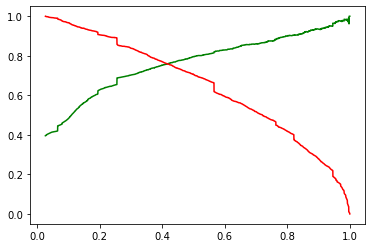

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Inference: From the graph above the intersection point is 0.4 which is almost close to the value infered from ROC Curve.

   ####  Making predictions on the test set

In [186]:
X_LeadTest[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_LeadTest[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [187]:
X_LeadTest = X_LeadTest[col]
X_LeadTest.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,0,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7766,0,0.019920,0.025968,0.090909,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,0,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4359,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [188]:
X_LeadTest_sm = sm.add_constant(X_LeadTest)

In [190]:
y_LeadTest_pred = result.predict(X_LeadTest_sm)

In [192]:
y_LeadTest_pred[:20]

4269    0.721430
2376    0.945808
7766    0.875196
9199    0.065511
4359    0.821091
9186    0.553823
1631    0.430287
8963    0.166866
8007    0.048938
5324    0.356028
2558    0.232773
8973    0.128821
2935    0.913739
2907    0.931713
957     0.226687
493     0.821091
3179    0.182818
3545    0.011394
6140    0.079717
4877    0.795677
dtype: float64

In [193]:
# Converting y_pred to a dataframe
y_Lead_pred = pd.DataFrame(y_LeadTest_pred)

In [194]:
#the head
y_Lead_pred.head()

,0
4269,0.721430
2376,0.945808
7766,0.875196
9199,0.065511
4359,0.821091


In [196]:
# Converting y_test to dataframe
y_Lead_Test_df = pd.DataFrame(y_LeadTest)

In [197]:
# Putting CustID to index
y_Lead_Test_df['ID'] = y_Lead_Test_df.index

In [198]:
# Removing index for both dataframes
y_Lead_pred.reset_index(drop=True, inplace=True)
y_Lead_Test_df.reset_index(drop=True, inplace=True)

In [199]:
# Appending y_Lead_Test_df and y_Lead_pred
y_Lead_Pred_Final = pd.concat([y_Lead_Test_df, y_Lead_pred],axis=1)

In [200]:
y_Lead_Pred_Final.head()

,Converted,ID,0
0,1,4269,0.721430
1,1,2376,0.945808
2,1,7766,0.875196
3,0,9199,0.065511
4,1,4359,0.821091


In [201]:
# Renaming the column 
y_Lead_Pred_Final= y_Lead_Pred_Final.rename(columns={ 0 : 'Converted_Prob'})

In [202]:
y_Lead_Pred_Final.head()

,Converted,ID,Converted_Prob
0,1,4269,0.721430
1,1,2376,0.945808
2,1,7766,0.875196
3,0,9199,0.065511
4,1,4359,0.821091


In [203]:
y_Lead_Pred_Final['final_predicted'] = y_Lead_Pred_Final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [204]:
y_Lead_Pred_Final.head()


,Converted,ID,Converted_Prob,final_predicted
0,1,4269,0.721430,1
1,1,2376,0.945808,1
2,1,7766,0.875196,1
3,0,9199,0.065511,0
4,1,4359,0.821091,1


In [205]:
# finding overall accuracy.
metrics.accuracy_score(y_Lead_Pred_Final.Converted, y_Lead_Pred_Final.final_predicted)

0.8170995670995671

In [206]:
confusionMatrix2 = metrics.confusion_matrix(y_Lead_Pred_Final.Converted, y_Lead_Pred_Final.final_predicted )
confusionMatrix2

array([[1385,  292],
       [ 215,  880]], dtype=int64)

In [207]:
TP_final = confusionMatrix2[1,1] # true positive 
TN_final = confusionMatrix2[0,0] # true negatives
FP_final = confusionMatrix2[0,1] # false positives
FN_final = confusionMatrix2[1,0] # false negatives

In [208]:
# The sensitivity of this logistic regression model
TP_final / float(TP_final+FN_final)

0.8036529680365296

In [210]:
# Specificity
TN_final / float(TN_final+FP_final)

0.8258795468097794

## Sensitivity: 0.8036529680365296 and Specificity: 0.8258795468097794, so the model prediction on the test data is satisfactory.

# The Model is:

In [212]:
#Generalized Linear Model Regression 
X_Lead_Train_sm1 = sm.add_constant(X_LeadTrain[col])
logimdl3 = sm.GLM(y_LeadTrain,X_Lead_Train_sm1, family = sm.families.Binomial())
result1 = logimdl3.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.9
Date:                Mon, 13 Jun 2022   Deviance:                       5349.9
Time:                        08:31:11   Pearson chi2:                 7.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8147      0.105     -7.736      0.000      -1.021      -0.608
Do Not Email                                            -1.3277      0.197     -6.757      0.000      -1.713      -0.943
TotalVisits                                              8.9735      2.403      3.734      0.000       4.263      13.684
Total Time Spent on Website                              4.5654      0.165     27.740      0.000       4.243       4.888
Page Views Per Visit                                    -3.7900      1.291     -2.935      0.003      -6.321      -1.259
Lead Origin_Lead Add Form                                3.6742      0.200     18.398      0.000       3.283       4.066
Lead Source_Olark Chat                                   1.0789      0.120      9.004      0.000       0.844       1.314
Lead Source_Welingak Website                             1.9757      0.744      2.656      0.008       0.518       3.434
Last Activity_Converted to Lead                         -1.0569      0.229     -4.617      0.000      -1.506      -0.608
Last Activity_Email Bounced                             -1.1234      0.348     -3.231      0.001      -1.805      -0.442
Last Activity_Olark Chat Conversation                   -1.2349      0.193     -6.385      0.000      -1.614      -0.856
What is your current occupation_Housewife               22.9152   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_Working Professional     2.8096      0.188     14.909      0.000       2.440       3.179
Last Notable Activity_Email Link Clicked                -1.9119      0.272     -7.035      0.000      -2.445      -1.379
Last Notable Activity_Email Opened                      -1.3357      0.087    -15.357      0.000      -1.506      -1.165
Last Notable Activity_Had a Phone Conversation           2.0355      1.103      1.845      0.065      -0.126       4.197
Last Notable Activity_Modified                          -1.6872      0.099    -16.990      0.000      -1.882      -1.493
Last Notable Activity_Olark Chat Conversation           -1.4756      0.377     -3.917      0.000      -2.214      -0.737
Last Notable Activity_Page Visited on Website           -1.8434      0.204     -9.048      0.000      -2.243      -1.444
========================================================================================================================
"""

# The probability cutoff value is 0.35